# Lab 9 - Evaluation Lab

Manojkumar V K
CB.EN.U4CSE17040


## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial import distance
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score

### Reading and Understanding the Data

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', skiprows=9, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data cleaning

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Preparation

In [5]:
X=PCA(n_components=2).fit(df.drop(columns=['Outcome']))
X=X.transform(df.drop(columns=['Outcome']))
y = df['Outcome'].values

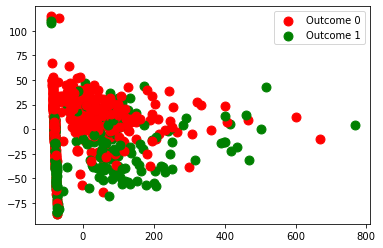

In [6]:
for i in range(0, X.shape[0]):
    if y[i] == 0:
        p1 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'red')
    elif y[i] == 1:
        p2 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'green')
plt.legend([p1,p2],['Outcome 0', 'Outcome 1'])
plt.show()

## Analyze the Clusters in data using DBSCAN

In [7]:
db = DBSCAN(eps=0.8, min_samples=19)
model = db.fit(X)
pred = model.labels_

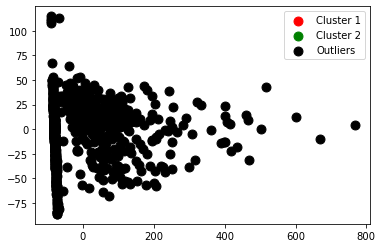

In [8]:
for i in range(0, X.shape[0]):
    if pred[i] == 0:
        p1 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'red')
    elif pred[i] == 1:
        p2 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'green')
    else:
        p3 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'black')
plt.legend([p1,p2,p3],['Cluster 1', 'Cluster 2', 'Outliers'])
plt.show()

### How successful has the clustering been in this regard?
With the give parameters (Eps=0.8, minPts=19), DBSCAN fails to capture any similarities in order to form a cluster. This is because there is no point in the dataset such that the distance between the point and its neighboring 19 points are less than 0.8

### Looking at each class individually, can you spot the particular class that is well identified by the clustering? Classes that are poorly identified?
No, since every point in the dataset is considered as a noise, no distinct clusters can be seen

### Which classes are mostly confused with each other?
All the classes were confused because of choosing wrong hyperparameters

In [9]:
p1 = X[0]
p2 = X[1]
d = distance.euclidean(p1, p2)
print("Euclidean distance: ",d)

Euclidean distance:  65.19836603412135


The distance between two points in the dataset is very much greater than 0.18. There does not exist 19 points which are closer than 0.18. This is the reason why DBSCAN considers every point as noise and thereby fails in clustering

### Find the clustering parameters

In [10]:
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)

In [11]:
print('Estimated number of clusters     : %d' % n_clusters_)
print('Estimated number of noise points : %d' % n_noise_)
print("Homogeneity                      : %0.3f" %  homogeneity_score(y, pred))
print("Completeness                     : %0.3f" %  completeness_score(y, pred))
print("V-measure                        : %0.3f" %  v_measure_score(y, pred))
print("Adjusted Rand Index              : %0.3f" %  adjusted_rand_score(y, pred))
print("Adjusted Mutual Information      : %0.3f" %  adjusted_mutual_info_score(y, pred))
# print("Silhouette Coefficient           : %0.3f" %  silhouette_score(X, pred))

Estimated number of clusters     : 0
Estimated number of noise points : 768
Homogeneity                      : 0.000
Completeness                     : 1.000
V-measure                        : 0.000
Adjusted Rand Index              : 0.000
Adjusted Mutual Information      : 0.000


## Compare the results with K-means

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
pred = kmeans.predict(X)

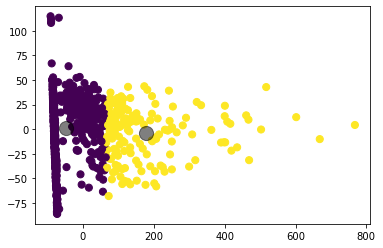

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [14]:
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)

In [15]:
print('Estimated number of clusters     : %d' % n_clusters_)
print('Estimated number of noise points : %d' % n_noise_)
print("Homogeneity                      : %0.3f" %  homogeneity_score(y, pred))
print("Completeness                     : %0.3f" %  completeness_score(y, pred))
print("V-measure                        : %0.3f" %  v_measure_score(y, pred))
print("Adjusted Rand Index              : %0.3f" %  adjusted_rand_score(y, pred))
print("Adjusted Mutual Information      : %0.3f" %  adjusted_mutual_info_score(y, pred))
print("Silhouette Coefficient           : %0.3f" %  silhouette_score(X, pred))

Estimated number of clusters     : 2
Estimated number of noise points : 0
Homogeneity                      : 0.026
Completeness                     : 0.033
V-measure                        : 0.029
Adjusted Rand Index              : 0.074
Adjusted Mutual Information      : 0.028
Silhouette Coefficient           : 0.614


**Difference** Even if there exists an outlier, KMeans clustering is affected.So none of the points are considered as noise and therefore, in the given scenario, with the given hyperparameters, KMeans actually performs better than DBSCAN.

In [16]:
db = DBSCAN(eps=40, min_samples=6)
model = db.fit(X)
pred = model.labels_

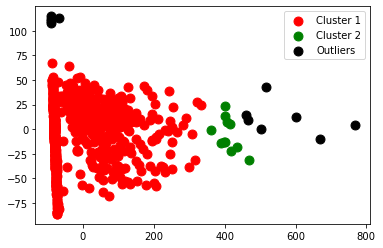

In [17]:
for i in range(0, X.shape[0]):
    if pred[i] == 0:
        p1 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'red')
    elif pred[i] == 1:
        p2 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'green')
    else:
        p3 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'black')
plt.legend([p1,p2,p3],['Cluster 1', 'Cluster 2', 'Outliers'])
plt.show()

In [18]:
from collections import Counter 
Counter(df['Outcome'].values)

Counter({1: 268, 0: 500})

In [19]:
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)
print('Estimated number of clusters     : %d' % n_clusters_)
print('Estimated number of noise points : %d' % n_noise_)
print("Homogeneity                      : %0.3f" %  homogeneity_score(y, pred))
print("Completeness                     : %0.3f" %  completeness_score(y, pred))
print("V-measure                        : %0.3f" %  v_measure_score(y, pred))
print("Adjusted Rand Index              : %0.3f" %  adjusted_rand_score(y, pred))
print("Adjusted Mutual Information      : %0.3f" %  adjusted_mutual_info_score(y, pred))
print("Silhouette Coefficient           : %0.3f" %  silhouette_score(X, pred))

Estimated number of clusters     : 2
Estimated number of noise points : 12
Homogeneity                      : 0.008
Completeness                     : 0.033
V-measure                        : 0.013
Adjusted Rand Index              : 0.020
Adjusted Mutual Information      : 0.009
Silhouette Coefficient           : 0.670


After changing the hyperparameters, the DBSCAN algorithm seems to be working better than the KMeans itself. This exercise shows how important choosing the correct value of hyperparameters are.